In [1]:
#import inportant libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Read and exploer data 

In [2]:
#read training data
df= pd.read_csv('training.csv',delimiter=";")
# return the frist ficv row
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [3]:
#geting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [4]:
#Null_values
df.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64

In [5]:
df.agg(['unique'])

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
unique,"[a, b, nan]","[17,92, 16,92, 31,25, 48,17, 32,33, 34,83, 26,...","[5,4e-05, 3,35e-05, 0,0001125, 0,0001335, 0,00...","[u, y, nan, l]","[g, p, nan, gg]","[c, k, ff, i, j, q, W, d, m, cc, aa, r, x, e, ...","[v, ff, o, h, j, bb, n, z, nan, dd]","[1,75, 0,29, 0, 0,335, 0,5, 0,25, 1,085, 1,5, ...","[f, t]","[t, f]","[1, 0, 2, 3, 5, 15, 20, 11, 4, 12, 7, 9, 14, 6...","[t, f]","[g, s, p]","[80.0, 200.0, 96.0, 0.0, 232.0, 160.0, 276.0, ...","[5, 0, 19, 120, 1, 204, 140, 13, 20, 21, 18, 4...","[800000.0, 2000000.0, 960000.0, 0.0, 2320000.0...","[t, nan, f]","[0, 1]","[no., yes.]"


In [9]:
# value_counts all cols appered (F,T) before fill nan.
print('value_counts var18')
print(df['variable18'].value_counts())
print('value_counts var9')
print(df['variable9'].value_counts())
print('value_counts var10')
print(df['variable10'].value_counts())
print('value_counts var19')
print(df['variable19'].value_counts())
print('value_counts classLabel')
print(df['classLabel'].value_counts())

value_counts var18
t    1023
f     532
Name: variable18, dtype: int64
value_counts var9
t    3171
f     529
Name: variable9, dtype: int64
value_counts var10
t    2239
f    1461
Name: variable10, dtype: int64
value_counts var19
1    3424
0     276
Name: variable19, dtype: int64
value_counts classLabel
yes.    3424
no.      276
Name: classLabel, dtype: int64


### Notes 
#### There are some col null.
#### var2, var3,var8,var14, var15,var17 ->num(Float)
#### some col need to convert from obj to cat
#### var1, var4, var5,var6, var7, var9, var10,var12, var13, var18, var19  



### Cleaing Data 

In [10]:
#replace "," to convert to float.
df['variable2']=df['variable2'].str.replace(',', '').astype(float)
df['variable3']=df['variable3'].str.replace(',', '').astype(float)
df['variable8']=df['variable8'].str.replace(',', '').astype(float)

In [11]:
# training=training.astype({'variable2':'float','variable3':'float','variable8':'float'})
values_mean ={'variable2':df['variable2'].mean()
,'variable3':df['variable3'].mean(),'variable8':df['variable8'].mean(),'variable14':df['variable14'].mean()
              ,'variable17':df['variable17'].mean()}
df=df.fillna(value=values_mean)


In [12]:
# convert the datatype object to category
df=df.astype({'variable1':'category','variable4':'category','variable5':'category','variable6':'category','variable7':'category'
         ,'variable9':'category','variable10':'category'
                 ,'variable12':'category','variable13':'category','variable18':'category','variable19':'category'})


In [13]:
## fill nan values in categort cols with mode/.
values ={'variable1':df['variable1'].mode()[0]
,'variable4':df['variable4'].mode()[0],'variable5':df['variable5'].mode()[0]
         ,'variable6':df['variable6'].mode()[0],'variable7':df['variable7'].mode()[0]
         ,'variable9':df['variable9'].mode()[0],'variable10':df['variable10'].mode()[0]
        ,'variable12':df['variable12'].mode()[0],'variable13':df['variable13'].mode()[0]
         ,'variable18':df['variable18'].mode()[0],'variable19':df['variable19'].mode()[0]}
df=df.fillna(value=values)


In [14]:
## check nan values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3700 non-null category
variable2     3700 non-null float64
variable3     3700 non-null float64
variable4     3700 non-null category
variable5     3700 non-null category
variable6     3700 non-null category
variable7     3700 non-null category
variable8     3700 non-null float64
variable9     3700 non-null category
variable10    3700 non-null category
variable11    3700 non-null int64
variable12    3700 non-null category
variable13    3700 non-null category
variable14    3700 non-null float64
variable15    3700 non-null int64
variable17    3700 non-null float64
variable18    3700 non-null category
variable19    3700 non-null category
classLabel    3700 non-null object
dtypes: category(11), float64(5), int64(2), object(1)
memory usage: 273.1+ KB


In [15]:
#replace ('no', 'yes' with (bool)0,1) and 
df['classLabel'].replace('no.','0',inplace=True)
df['classLabel'].replace('yes.','1',inplace=True)
df['classLabel'] =df['classLabel'].astype('category')
df['classLabel'].dtype

CategoricalDtype(categories=['0', '1'], ordered=False)

### Understand data 


In [16]:
# describe float and int values
df.describe()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3.700000e+03
mean,2698.231631,1210.569655,720.540000,4.160000,162.695000,2246.705946,1.626950e+06
std,1681.454083,3163.834623,1930.736215,6.750553,153.921934,8708.571126,1.539219e+06
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1917.000000,0.000830,8.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2567.000000,55.000000,71.000000,2.000000,120.000000,113.000000,1.200000e+06
75%,3625.000000,452.250000,415.000000,6.000000,274.000000,1059.750000,2.740000e+06
max,8025.000000,26335.000000,14415.000000,67.000000,1160.000000,100000.000000,1.160000e+07


#### the mean, max and std in var 14 , var 17 the same but the var17 *10**6 :: maybe have the same values< look at (if ture will delete the col

In [33]:
print('sum of var17 / sum of var14: ',df['variable17'].sum()/df['variable14'].sum())
# this is true 
df[['variable17','variable14']].head()



sum of var17 / sum of var14:  10000.0


,variable17,variable14
0,800000.0,80.0
1,2000000.0,200.0
2,960000.0,96.0
3,0.0,0.0
4,2320000.0,232.0


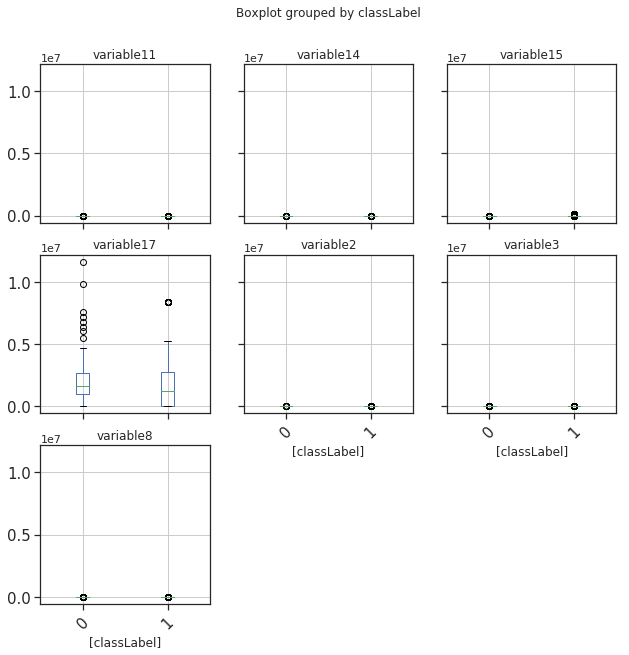

In [35]:
boxplot = df.boxplot(by='classLabel',figsize  =(10,10),grid=True, rot=45, fontsize=15)

#### comment 
#### There are outlier in variable17

In [34]:
df.describe(include='category')

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable12,variable13,variable18,variable19,classLabel
count,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
unique,2,3,3,14,9,2,2,2,3,2,2,2
top,b,u,g,c,v,t,t,f,g,t,1,1
freq,2421,3119,3119,853,2081,3171,2239,1924,3430,3168,3424,3424


In [36]:
corr_class= df.assign(classLabel=df.classLabel.astype('category').cat.codes).corr()
corr_class['classLabel'].sort_values(ascending=False)

classLabel    1.000000
variable11    0.153039
variable8     0.069770
variable15    0.066893
variable3     0.020068
variable2     0.017983
variable17   -0.050644
variable14   -0.050644
Name: classLabel, dtype: float64

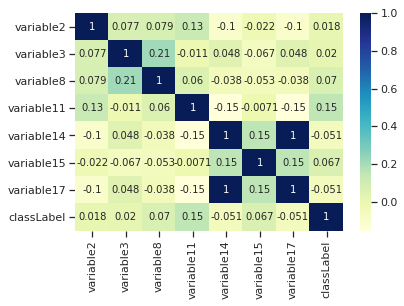

In [37]:
sns.heatmap(corr_class, 
        xticklabels=corr_class.columns,
        yticklabels=corr_class.columns,annot=True,cmap="YlGnBu")



In [38]:
## visluation the category cols
def cate_corr(col):
    poutcome = pd.crosstab(df[col], df['classLabel'])
    return(poutcome.plot(kind='bar'))


In [39]:
## rate of category 
def cate_rate(col):
    return(df.groupby(col).size()/len(df)*100)


In [40]:
cate_list=['variable1','variable4','variable5','variable6','variable7'
 ,'variable9','variable10','variable12','variable13','variable18','variable19','classLabel']

In [41]:
### calcules rate of cate
for i in range(len(cate_list)):
    print(cate_rate(cate_list[i]))

variable1
a    34.567568
b    65.432432
dtype: float64
variable4
l     0.864865
u    84.297297
y    14.837838
dtype: float64
variable5
g     84.297297
gg     0.864865
p     14.837838
dtype: float64
variable6
W      9.810811
aa     5.675676
c     23.054054
cc     9.270270
d      2.540541
e      3.702703
ff     3.675676
i      5.162162
j      1.054054
k      4.594595
m      4.837838
q     16.540541
r      0.891892
x      9.189189
dtype: float64
variable7
bb     9.162162
dd     0.540541
ff     4.162162
h     26.216216
j      1.000000
n      0.891892
o      0.459459
v     56.243243
z      1.324324
dtype: float64
variable9
f    14.297297
t    85.702703
dtype: float64
variable10
f    39.486486
t    60.513514
dtype: float64
variable12
f    52.0
t    48.0
dtype: float64
variable13
g    92.702703
p     2.189189
s     5.108108
dtype: float64
variable18
f    14.378378
t    85.621622
dtype: float64
variable19
0     7.459459
1    92.540541
dtype: float64
classLabel
0     7.459459
1    92.540541
dty

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


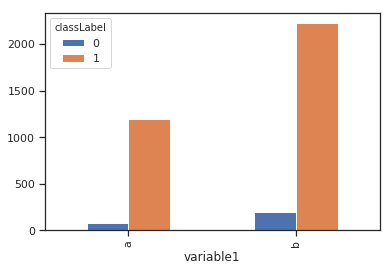

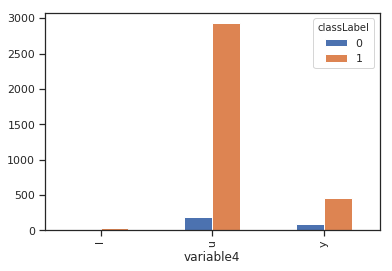

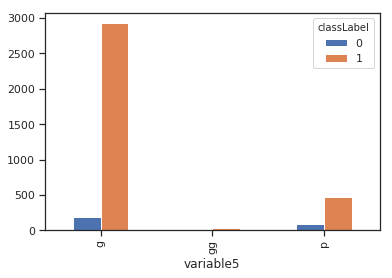

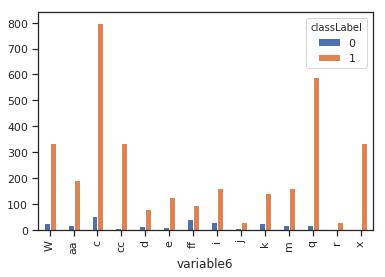

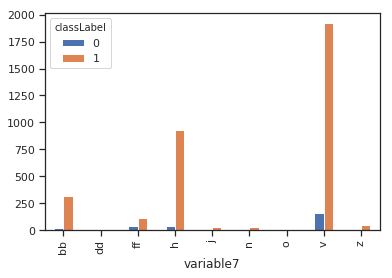

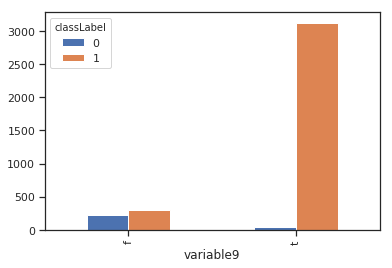

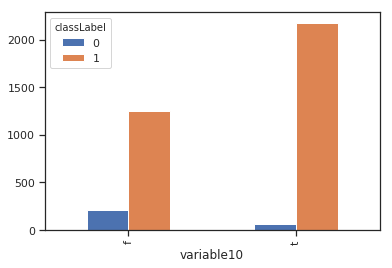

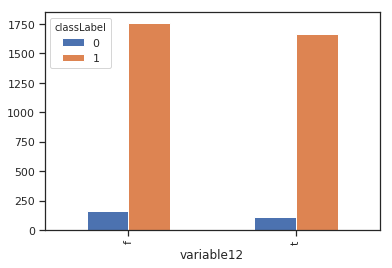

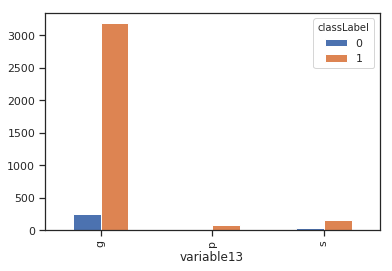

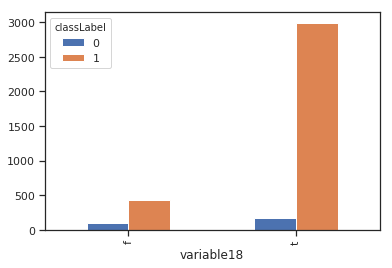

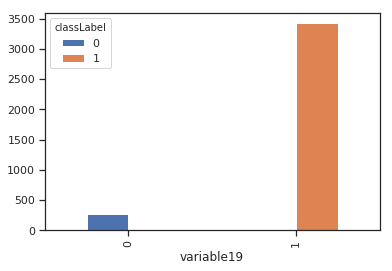

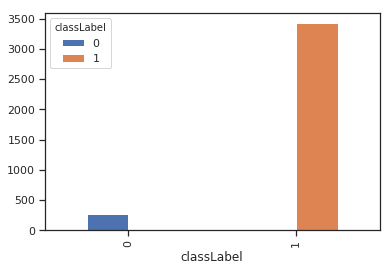

In [42]:
# barplot all category cols
for i in range(len(cate_list)):
    print(cate_corr(cate_list[i]))

# comment 
#### var9 and var 18 (have the same values)
#### var19 and classLabel (the same values)
#### var4 and var 5 (have the same values but differnce catefory)

### import ML lib and bulid model  

In [44]:
!pip install imblearn


    100% |████████████████████████████████| 174kB 17.4MB/s 


In [45]:
#import libs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE



In [46]:
X= df.drop(['classLabel','variable17','variable18','variable19'],axis=1)

In [47]:
label = LabelEncoder()
X=X.apply(label.fit_transform)


In [48]:
y=df['classLabel']
y=np.array(y)
print(X.shape)
print(y.shape)


(3700, 15)
(3700,)


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state=42)

In [51]:
sm = SMOTE(random_state=42, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(X_train_res.shape)

(2960, 15)
(740, 15)
(5510, 15)


In [53]:
#model Tree 
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth =1)
drugTree.fit(X_train_res, y_train_res)
predTree = drugTree.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test,predTree))
print('accuracy_train',metrics.accuracy_score(y_train_res,drugTree.predict(X_train_res)))
print(confusion_matrix(y_test,predTree))
print(classification_report(y_test,predTree))


accuracy_test 0.9027027027027027
accuracy_train 0.9344827586206896
[[ 53  18]
 [ 54 615]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        71
           1       0.97      0.92      0.94       669

   micro avg       0.90      0.90      0.90       740
   macro avg       0.73      0.83      0.77       740
weighted avg       0.93      0.90      0.91       740



In [54]:
# #model SVC derop 3 cols
clf = svm.SVC(C=.01,kernel='rbf',gamma=.01)
clf.fit(X_train_res, y_train_res) 
predSvc = clf.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test,predSvc))
print('accuracy_train',metrics.accuracy_score(y_train,clf.predict(X_train)))
print(confusion_matrix(y_test,predSvc))
print(classification_report(y_test,predSvc))


accuracy_test 0.9067567567567567
accuracy_train 0.9793918918918919
[[  2  69]
 [  0 669]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        71
           1       0.91      1.00      0.95       669

   micro avg       0.91      0.91      0.91       740
   macro avg       0.95      0.51      0.50       740
weighted avg       0.92      0.91      0.86       740



In [55]:
df_val= pd.read_csv('validation.csv',delimiter=";")
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


#### Read validation data and Applied the model


In [34]:
df.agg(['unique'])

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
unique,"[a, b] Categories (2, object): [a, b]","[1792.0, 1692.0, 3125.0, 4817.0, 3233.0, 3483....","[0.00054, 0.00335, 1125.0, 1335.0, 35.0, 125.0...","[u, y, l] Categories (3, object): [u, y, l]","[g, p, gg] Categories (3, object): [g, p, gg]","[c, k, ff, i, j, ..., cc, aa, r, x, e] Length:...","[v, ff, o, h, j, bb, n, z, dd] Categories (9, ...","[175.0, 29.0, 0.0, 335.0, 5.0, 25.0, 1085.0, 1...","[f, t] Categories (2, object): [f, t]","[t, f] Categories (2, object): [t, f]","[1, 0, 2, 3, 5, 15, 20, 11, 4, 12, 7, 9, 14, 6...","[t, f] Categories (2, object): [t, f]","[g, s, p] Categories (3, object): [g, s, p]","[80.0, 200.0, 96.0, 0.0, 232.0, 160.0, 276.0, ...","[5, 0, 19, 120, 1, 204, 140, 13, 20, 21, 18, 4...","[800000.0, 2000000.0, 960000.0, 0.0, 2320000.0...","[t, f] Categories (2, object): [t, f]","[0, 1] Categories (2, int64): [0, 1]","[0, 1] Categories (2, object): [0, 1]"


In [56]:
df_val.agg(['unique'])

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
unique,"[b, a, nan]","[32,33, 23,58, 36,42, 18,42, 24,5, 39,08, 23,4...","[0,00075, 0,000179, 7,5e-05, 0,0010415, 0,0013...","[u, y, nan]","[g, p, nan]","[e, c, d, aa, m, k, ff, W, q, i, x, cc, nan, j]","[bb, v, ff, z, h, nan, dd, n, j]","[1,585, 0,54, 0,585, 0,125, 0,04, 3, 0,5, 2, 0...","[t, f]","[f, t]","[0, 1, 2, 20, 3, 5, 9, 11, 17, 10, 4, 6, 14, 1...","[t, f]","[s, g, p]","[420.0, 136.0, 240.0, 120.0, 480.0, 280.0, 460...","[0, 1, 3, 375, 475, 68, 350, 126, 20, 5552, 50...","[4200000.0, 1360000.0, 2400000.0, 1200000.0, 4...","[nan, f, t]","[1, 0]","[no., yes.]"


In [57]:
#Null_values
df_val.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
classLabel      0
dtype: int64

In [58]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
variable1     197 non-null object
variable2     197 non-null object
variable3     200 non-null object
variable4     198 non-null object
variable5     198 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     200 non-null object
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    197 non-null float64
variable15    200 non-null int64
variable17    197 non-null float64
variable18    89 non-null object
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 29.8+ KB


In [59]:
# #replace "," to convert to float.
df_val['variable2']=df_val['variable2'].str.replace(',', '').astype(float)
df_val['variable3']=df_val['variable3'].str.replace(',', '').astype(float)
df_val['variable8']=df_val['variable8'].str.replace(',', '').astype(float)
##fill the nan value contionus with mean.
values_mean_val ={'variable2':df_val['variable2'].mean(),'variable14':df_val['variable14'].mean(),'variable17':df_val['variable17'].mean()}
df_val=df_val.fillna(value=values_mean_val)



In [60]:
# convert the datatype object to category
df_val=df_val.astype({'variable1':'category','variable4':'category','variable5':'category','variable6':'category','variable7':'category'
         ,'variable9':'category','variable10':'category'
                 ,'variable12':'category','variable13':'category','variable18':'category','variable19':'category'})
## fill nan values in categort cols with mode/.
values_val ={'variable1':df_val['variable1'].mode()[0]
,'variable4':df_val['variable4'].mode()[0],'variable5':df_val['variable5'].mode()[0]
         ,'variable6':df_val['variable6'].mode()[0],'variable7':df_val['variable7'].mode()[0]
         ,'variable18':df_val['variable18'].mode()[0]}
df_val=df_val.fillna(value=values_val)


In [61]:
df_val['classLabel'].replace('no.','0',inplace=True)
df_val['classLabel'].replace('yes.','1',inplace=True)
df_val['classLabel'] =df_val['classLabel'].astype('category')


In [ ]:
X_val= df_val.drop(['classLabel','variable17','variable18','variable19'],axis=1)
label = LabelEncoder()
X_val=X_val.apply(label.fit_transform)
y_val=df_val['classLabel']
y_val=np.array(y_val)

print(X_val.shape)


In [63]:
##predTree with max =1 
predTree_val = drugTree.predict(X_val)
print('accuracy_test',metrics.accuracy_score(y_val,predTree_val))
print(confusion_matrix(y_val,predTree_val))
print(classification_report(y_val,predTree_val))


accuracy_test 0.85
[[81 26]
 [ 4 89]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       107
           1       0.77      0.96      0.86        93

   micro avg       0.85      0.85      0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.87      0.85      0.85       200



In [77]:
# clf with c= .1 and gamm=.1
predSvc_val = clf.predict(X_val)
print('accuracy_test',metrics.accuracy_score(y_val,predSvc_val))
print(confusion_matrix(y_val,predSvc_val))
print(classification_report(y_val,predSvc_val))


accuracy_test 0.47
[[  3 104]
 [  2  91]]
              precision    recall  f1-score   support

           0       0.60      0.03      0.05       107
           1       0.47      0.98      0.63        93

   micro avg       0.47      0.47      0.47       200
   macro avg       0.53      0.50      0.34       200
weighted avg       0.54      0.47      0.32       200



In [72]:
param_grid = {'max_depth': [1,2,4], 'criterion': ['entropy']}
model= DecisionTreeClassifier()
# drugTree = DecisionTreeClassifier(criterion="entropy", max_depth =5)

grid= GridSearchCV(model,param_grid,refit=True,verbose=5)
# May take awhile!
test=grid.fit(X_train_res, y_train_res)
grid_predictions= grid.predict(X_test)

print('accuracy_test',metrics.accuracy_score(y_test, grid_predictions))
print('accuracy_train',metrics.accuracy_score(y_train_res,grid.predict(X_train_res)))
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(grid.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] criterion=entropy, max_depth=1 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.9249183895538629, total=   0.0s
[CV] criterion=entropy, max_depth=1 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.9417211328976035, total=   0.0s
[CV] criterion=entropy, max_depth=1 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.9368191721132898, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.9319912948857454, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.9498910675381264, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.9444444444444444, total=   0.0s
[CV] criterion=entropy, max_depth=4 ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, score=0.960239651416122, total=   0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.9526143790849673, total=   0.0s
accuracy_test 0.9283783783783783
accuracy_train 0.9542649727767695
[[ 53  18]
 [ 35 634]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        71
           1       0.97      0.95      0.96       669

   micro avg       0.93      0.93      0.93       740
   macro avg       0.79      0.85      0.81       740
weighted avg       0.94      0.93      0.93       740

{'criterion': 'entropy', 'max_depth': 4}


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished


In [73]:
grid_predictions_val = grid.predict(X_val)
print('accuracy_train',metrics.accuracy_score(y_val,grid_predictions_val))
print(confusion_matrix(y_val,grid_predictions_val))
print(classification_report(y_val,grid_predictions_val))



accuracy_train 0.6
[[29 78]
 [ 2 91]]
              precision    recall  f1-score   support

           0       0.94      0.27      0.42       107
           1       0.54      0.98      0.69        93

   micro avg       0.60      0.60      0.60       200
   macro avg       0.74      0.62      0.56       200
weighted avg       0.75      0.60      0.55       200



In [74]:
param_grid_svc = {'C': [.1,.01,.001,.3,.5], 'gamma': [.01,.1], 'kernel': ['rbf']}
model_svc = svm.SVC()

grid_svc = GridSearchCV(model_svc,param_grid_svc,refit=True,verbose=2)
# May take awhile!
test=grid_svc.fit(X_train,y_train)
grid_predictions_svc = grid_svc.predict(X_test)

print('accuracy_test',metrics.accuracy_score(y_test, grid_predictions_svc))
print('accuracy_train',metrics.accuracy_score(y_train,grid_svc.predict(X_train)))
print(confusion_matrix(y_test,grid_predictions_svc))
print(classification_report(y_test,grid_predictions_svc))
print(grid_svc.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.9s finished


accuracy_train 0.9307432432432432
[[  0  71]
 [  0 669]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.90      1.00      0.95       669

   micro avg       0.90      0.90      0.90       740
   macro avg       0.45      0.50      0.47       740
weighted avg       0.82      0.90      0.86       740

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [78]:
grid_predictions_SVC_val = grid_svc.predict(X_val)
print('accuracy_train',metrics.accuracy_score(y_val,grid_predictions_SVC_val))
print(confusion_matrix(y_val,grid_predictions_SVC_val))
print(classification_report(y_val,grid_predictions_SVC_val))



accuracy_train 0.465
[[  0 107]
 [  0  93]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.47      1.00      0.63        93

   micro avg       0.47      0.47      0.47       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.22      0.47      0.30       200



## Final Model
### I chosse the model D/ecision Tree>>> with max=1 

In [86]:
from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(drugTree, 'drugTree.pkl') 
# and later you can load it
drugTree_model = joblib.load('drugTree.pkl')

In [87]:
drugTree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
per_model = drugTree_model.predict(X_val)
print('accuracy_train',metrics.accuracy_score(y_val,per_model))
print(confusion_matrix(y_val,per_model))
print(classification_report(y_val,per_model))



accuracy_train 0.85
[[81 26]
 [ 4 89]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       107
           1       0.77      0.96      0.86        93

   micro avg       0.85      0.85      0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.87      0.85      0.85       200

